In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
d = pd.read_csv("crop_yield.csv")
d

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0,20.0,9.0
95,425.0,60.0,39.0,65.0,19.0,17.0,6.5
96,1220.0,79.0,28.0,77.0,23.0,21.0,10.5
97,480.0,65.0,36.0,68.0,21.0,16.0,7.0


**EXPLORATORY DATA ANALYSIS**

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rain Fall (mm)              99 non-null     float64
 1   Fertilizer(urea) (kg/acre)  99 non-null     float64
 2   Temperature (°C)            99 non-null     float64
 3   Nitrogen (N)                99 non-null     float64
 4   Phosphorus (P)              99 non-null     float64
 5   Potassium (K)               99 non-null     float64
 6   Yeild (Q/acre)              99 non-null     float64
dtypes: float64(7)
memory usage: 5.5 KB


In [4]:
d.isnull().sum()

Rain Fall (mm)                0
Fertilizer(urea) (kg/acre)    0
Temperature (°C)              0
Nitrogen (N)                  0
Phosphorus (P)                0
Potassium (K)                 0
Yeild (Q/acre)                0
dtype: int64

In [5]:
d.nunique()

Rain Fall (mm)                25
Fertilizer(urea) (kg/acre)    19
Temperature (°C)              13
Nitrogen (N)                  21
Phosphorus (P)                 8
Potassium (K)                  8
Yeild (Q/acre)                13
dtype: int64

In [6]:
for i in d.columns:
    print(f"{i} - {d[i].unique()}")

Rain Fall (mm) - [1230.  480. 1250.  450. 1200.  500. 1275.  425.  400. 1280.  415. 1225.
 1300.  410. 1150.  405.  475.  440. 1175.  460.  445. 1220.  430. 1245.
  455.]
Fertilizer(urea) (kg/acre) - [80. 60. 75. 65. 70. 71. 77. 50. 55. 79. 78. 76. 73. 72. 58. 52. 62. 56.
 59.]
Temperature (°C) - [28. 36. 29. 35. 27. 34. 37. 39. 26. 38. 24. 25. 40.]
Nitrogen (N) - [80. 70. 78. 79. 74. 77. 67. 60. 65. 76. 59. 75. 73. 61. 66. 68. 64. 63.
 71. 72. 62.]
Phosphorus (P) - [24. 20. 22. 19. 21. 18. 23. 25.]
Potassium (K) - [20. 18. 19. 16. 15. 17. 21. 22.]
Yeild (Q/acre) - [12.   8.  11.   9.  10.   7.   6.   5.5  6.5  7.5  8.5  9.5 10.5]


In [7]:
d.describe()

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,32.393939,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,5.426350,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,38.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Axes(0.0675185,0.194259;0.919232x0.755741)
Axes(0.0500185,0.194259;0.939981x0.755741)


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Axes(0.0500185,0.194259;0.939981x0.755741)
Axes(0.0500185,0.194259;0.939981x0.755741)


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Axes(0.0500185,0.194259;0.939981x0.755741)
Axes(0.0500185,0.194259;0.939981x0.739816)


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Axes(0.0500185,0.194259;0.939981x0.755741)


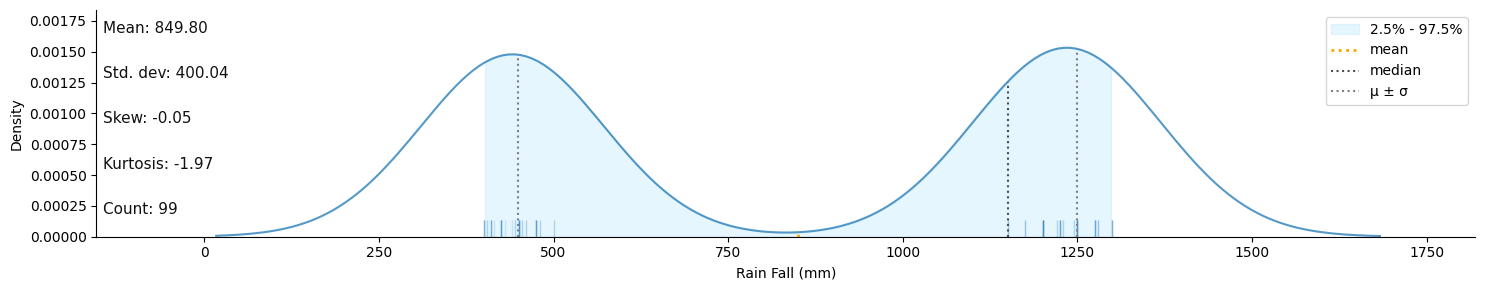

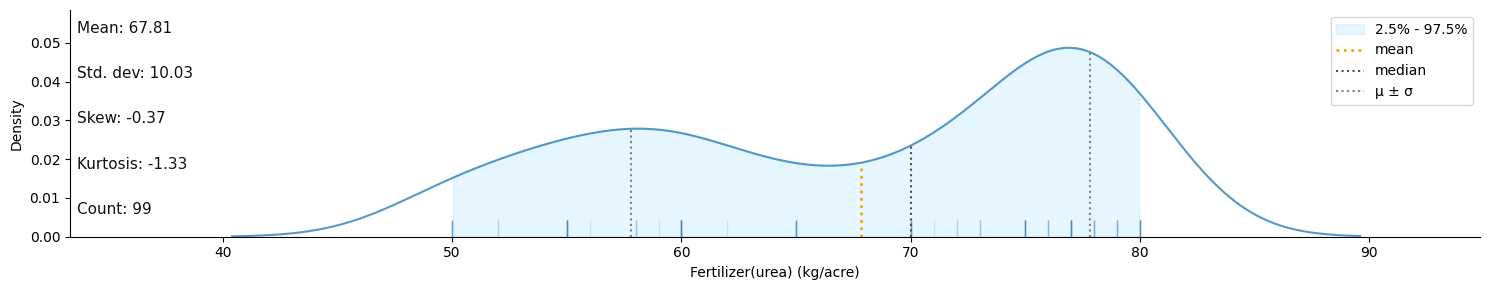

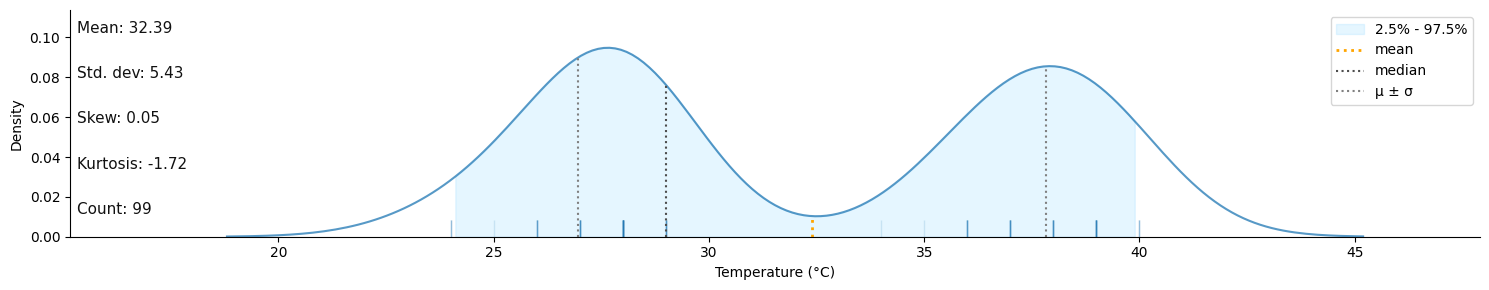

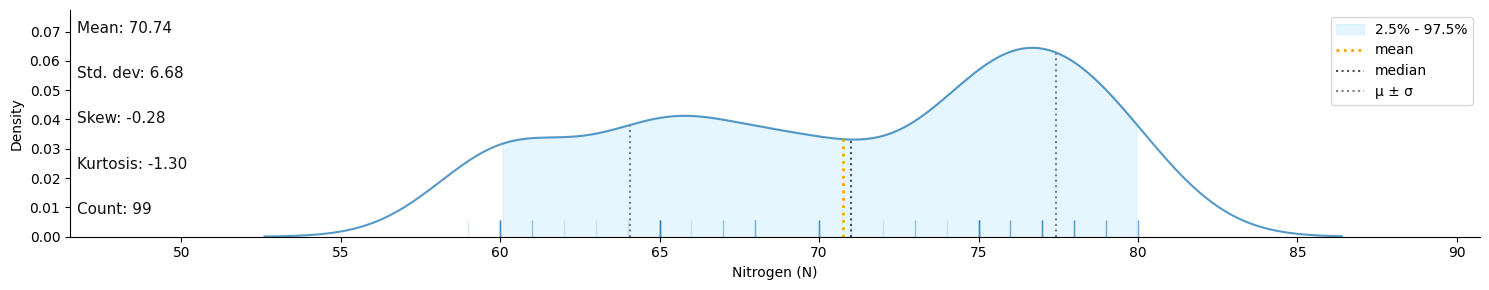

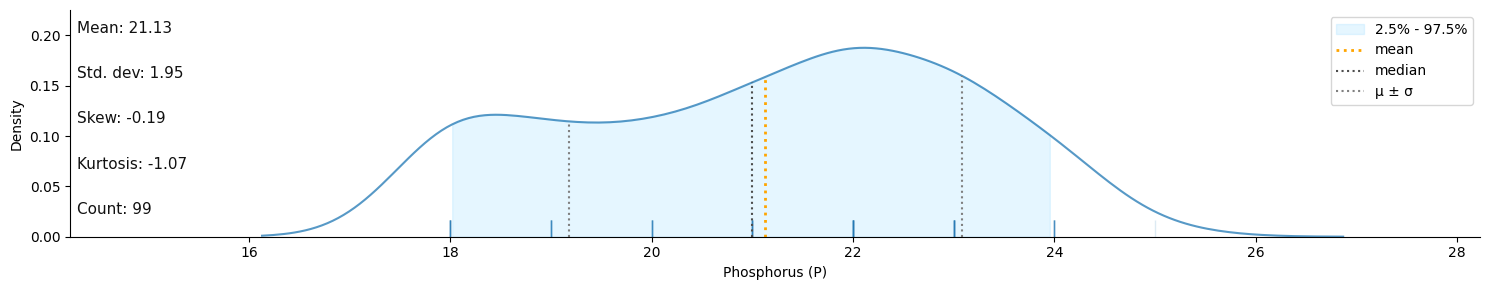

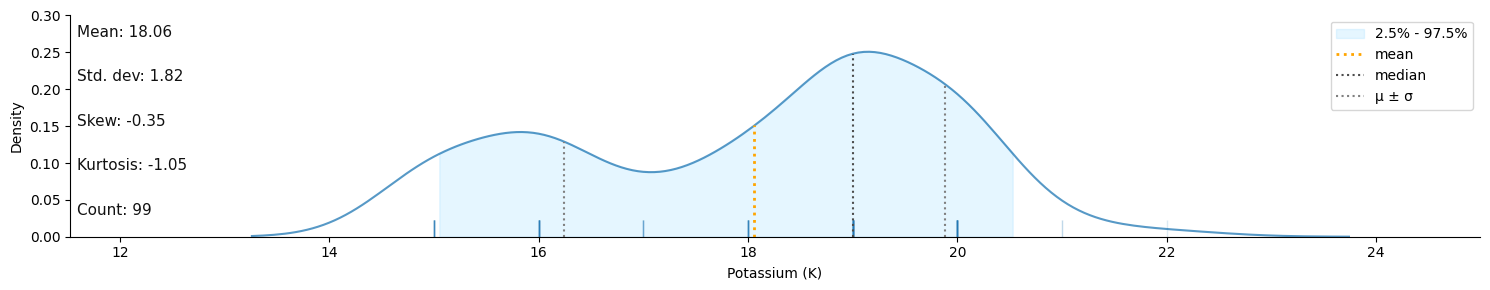

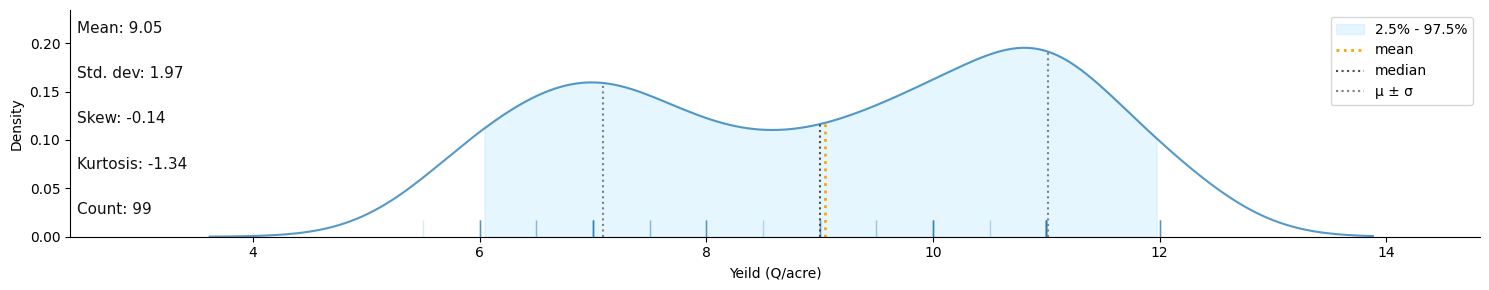

In [8]:
for i in d.columns:
    print(klib.dist_plot(d[i]))

In [9]:
klib.corr_mat(d)

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
Rain Fall (mm),1.00,0.89,-0.97,0.88,0.78,0.81,0.89
Fertilizer(urea) (kg/acre),0.89,1.00,-0.86,0.91,0.82,0.76,0.83
Temperature (°C),-0.97,-0.86,1.00,-0.85,-0.78,-0.78,-0.89
Nitrogen (N),0.88,0.91,-0.85,1.00,0.78,0.81,0.88
Phosphorus (P),0.78,0.82,-0.78,0.78,1.00,0.75,0.80
Potassium (K),0.81,0.76,-0.78,0.81,0.75,1.00,0.86
Yeild (Q/acre),0.89,0.83,-0.89,0.88,0.80,0.86,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

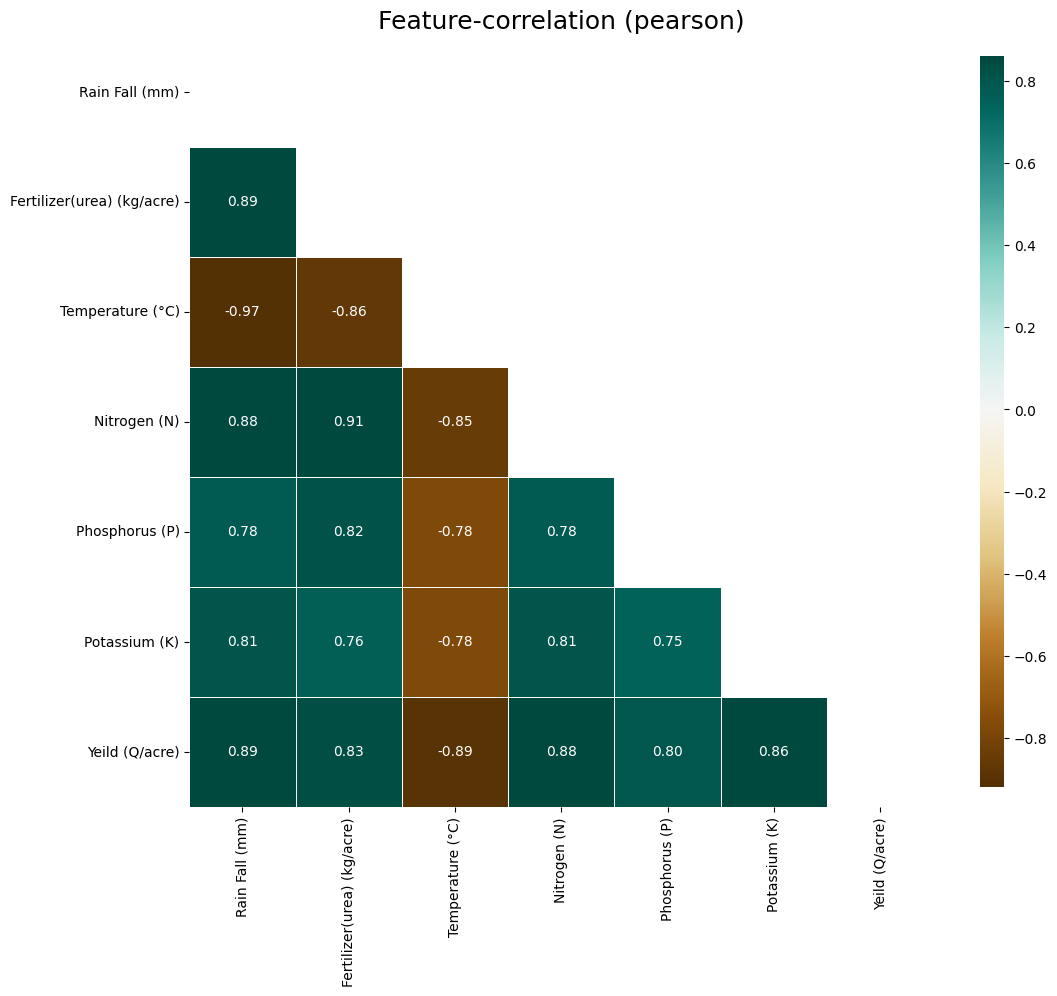

In [10]:
klib.corr_plot(d)

There is a strong coorelation with features with the target.

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


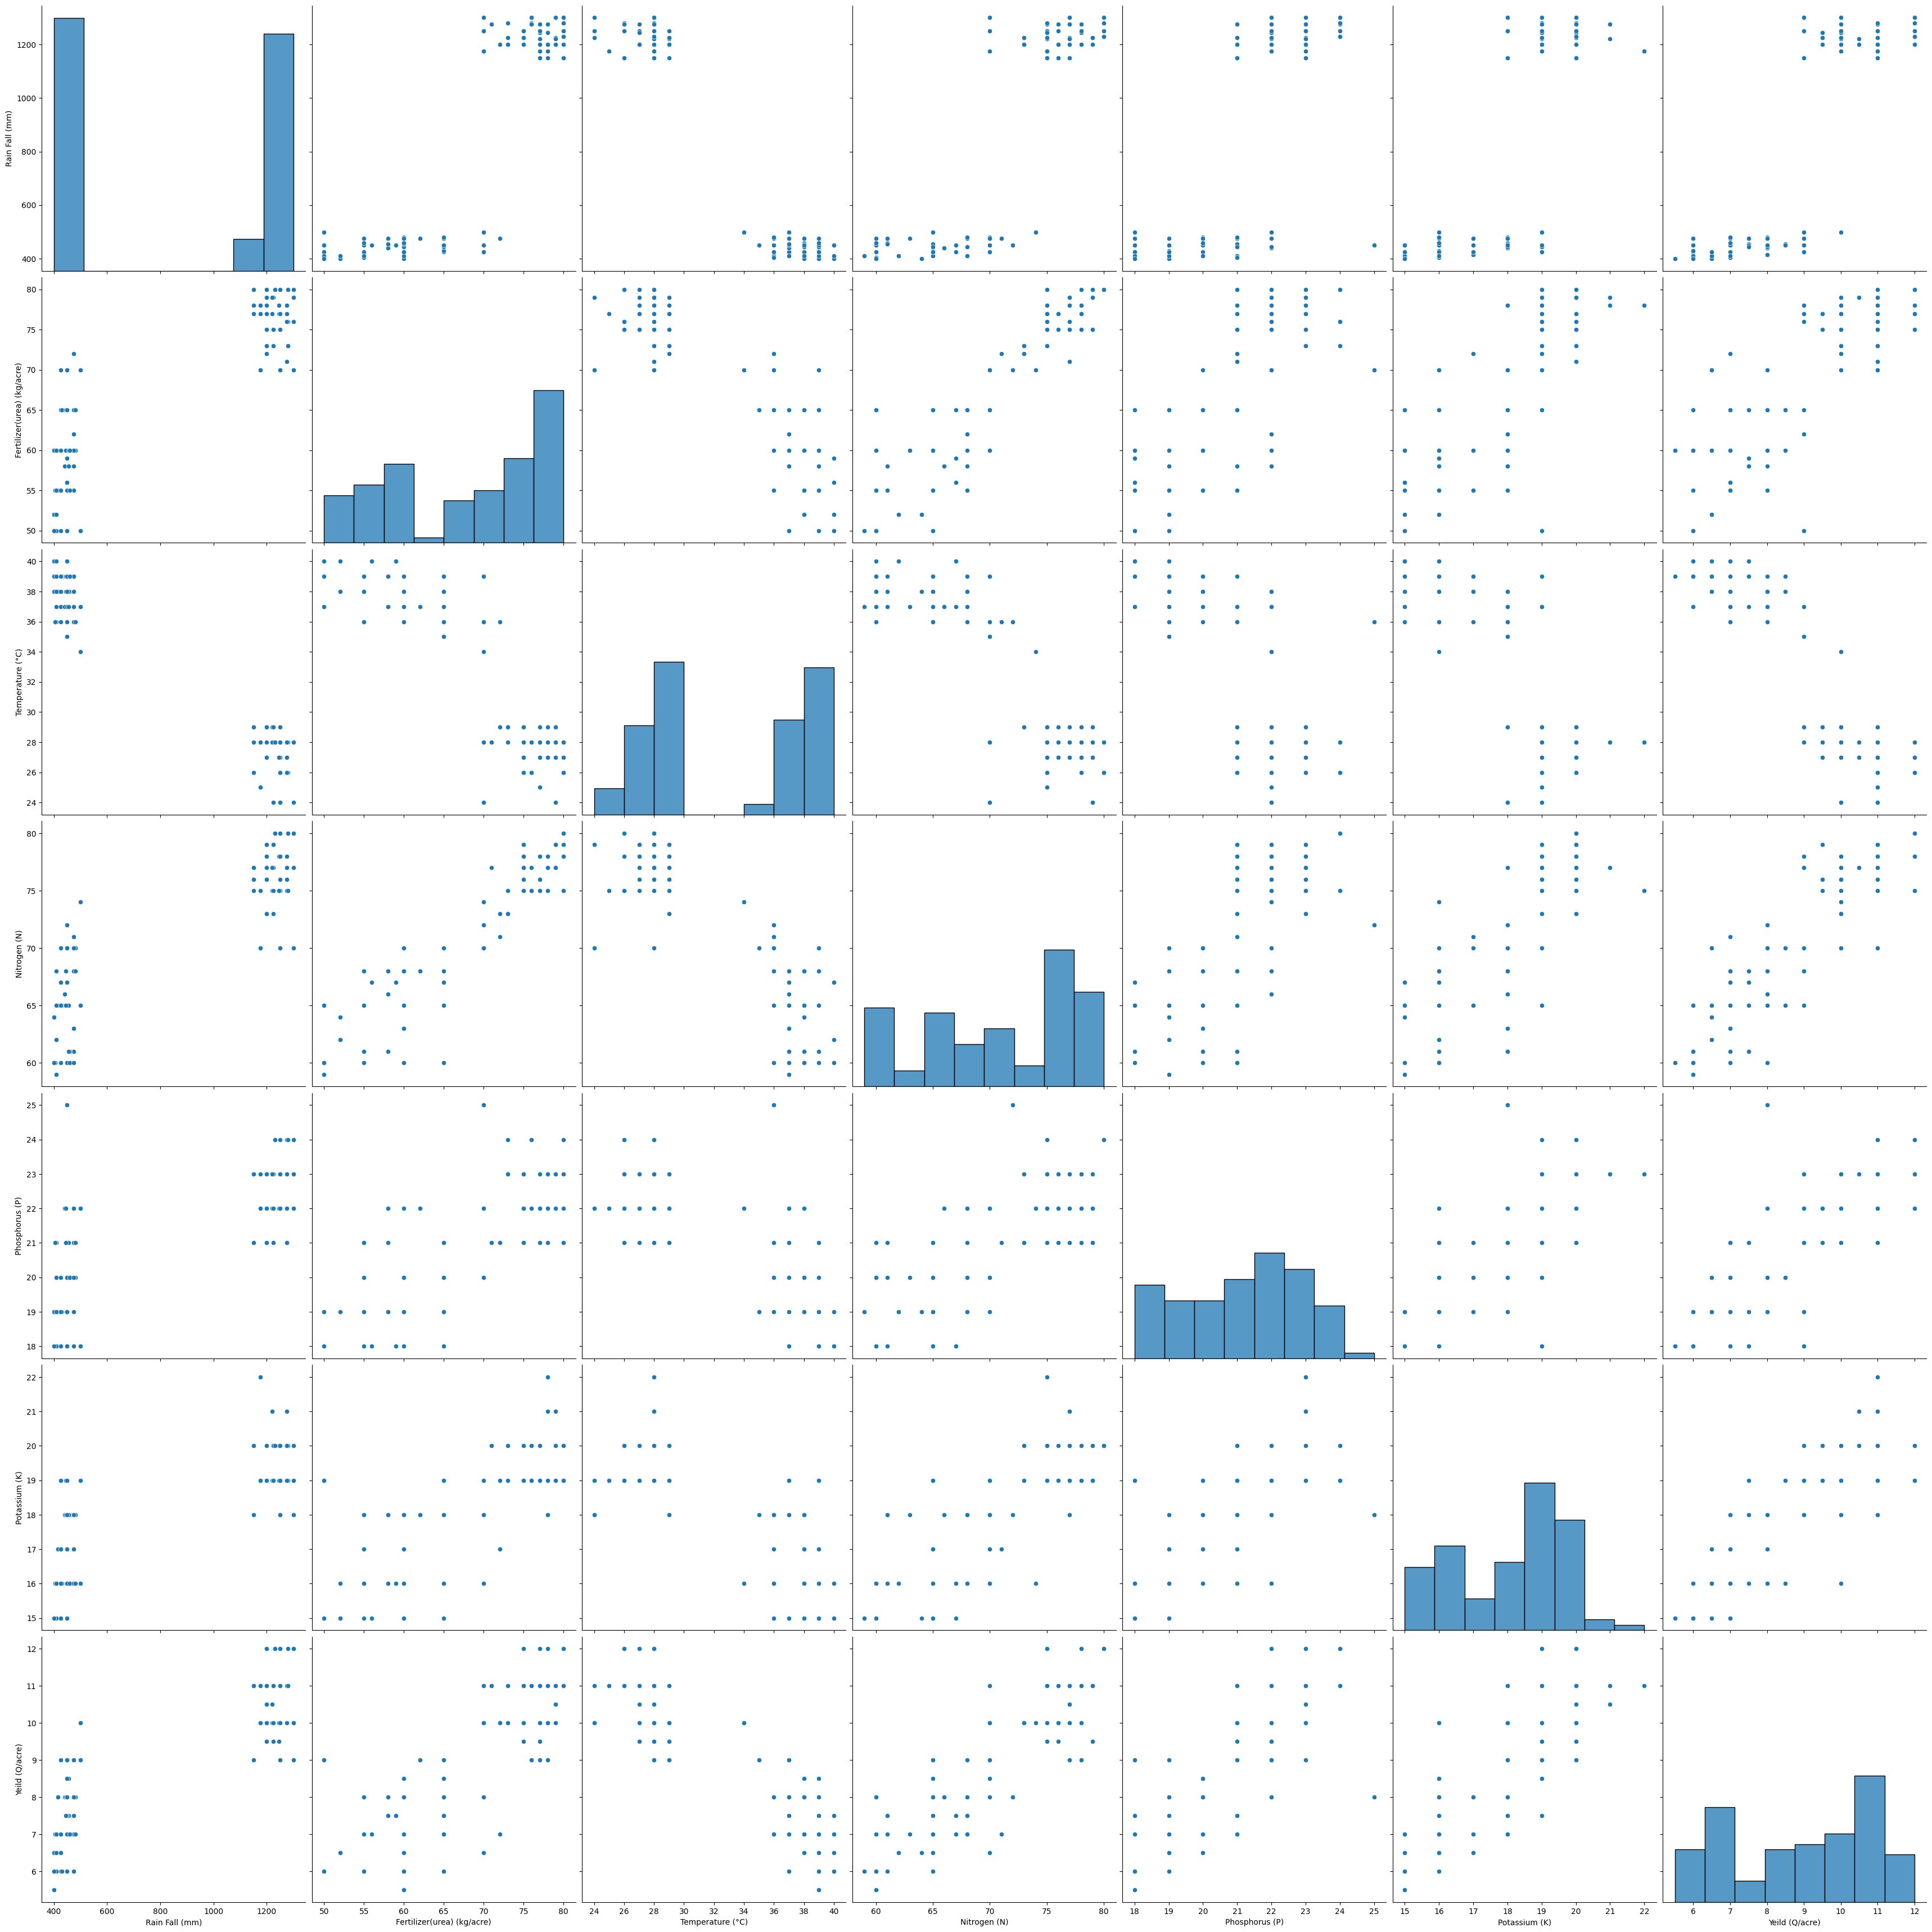

In [11]:
sns.pairplot(d,size=5)

**PREPROCESSING**

*FEATURE SCALING*

In [12]:
x = d.iloc[:,:5]
x

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P)
0,1230.0,80.0,28.0,80.0,24.0
1,480.0,60.0,36.0,70.0,20.0
2,1250.0,75.0,29.0,78.0,22.0
3,450.0,65.0,35.0,70.0,19.0
4,1200.0,80.0,27.0,79.0,22.0
...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0
95,425.0,60.0,39.0,65.0,19.0
96,1220.0,79.0,28.0,77.0,23.0
97,480.0,65.0,36.0,68.0,21.0


In [13]:
y = d.iloc[:,6]
y

0     12.0
1      8.0
2     11.0
3      9.0
4     11.0
      ... 
94     9.0
95     6.5
96    10.5
97     7.0
98    12.0
Name: Yeild (Q/acre), Length: 99, dtype: float64

In [14]:
x = x.to_numpy()
x

array([[1230.,   80.,   28.,   80.,   24.],
       [ 480.,   60.,   36.,   70.,   20.],
       [1250.,   75.,   29.,   78.,   22.],
       [ 450.,   65.,   35.,   70.,   19.],
       [1200.,   80.,   27.,   79.,   22.],
       [ 500.,   70.,   34.,   74.,   22.],
       [1275.,   71.,   28.,   77.,   21.],
       [ 425.,   65.,   37.,   67.,   18.],
       [1200.,   77.,   27.,   78.,   23.],
       [ 400.,   50.,   39.,   60.,   18.],
       [1280.,   80.,   26.,   80.,   24.],
       [ 415.,   55.,   38.,   65.,   19.],
       [1225.,   79.,   29.,   79.,   23.],
       [ 425.,   50.,   37.,   65.,   18.],
       [1250.,   70.,   24.,   70.,   22.],
       [ 400.,   60.,   39.,   60.,   18.],
       [1300.,   80.,   28.,   80.,   24.],
       [ 410.,   55.,   36.,   65.,   21.],
       [1150.,   77.,   28.,   76.,   23.],
       [1200.,   78.,   27.,   78.,   23.],
       [ 410.,   50.,   37.,   59.,   19.],
       [1280.,   76.,   26.,   75.,   24.],
       [ 425.,   55.,   38.,   6

In [15]:
y = y.to_numpy()
y

array([12. ,  8. , 11. ,  9. , 11. , 10. , 11. ,  7. , 12. ,  6. , 12. ,
        8. , 11. ,  9. , 11. ,  5.5, 12. ,  7. , 11. , 12. ,  6. , 11. ,
        7. , 10. ,  9. , 10. ,  6. , 12. ,  7. , 10. , 11. ,  6. , 11. ,
        7. , 10. ,  9. , 10. ,  6. , 12. ,  8. , 11. ,  7. , 11. ,  6. ,
       11. ,  7. , 11. ,  8. , 10. ,  6. , 11. ,  6. , 11. ,  6.5, 10. ,
        7.5, 11. ,  9. , 10. ,  7. , 11. ,  6.5, 11. ,  7. , 11. ,  7. ,
       11. ,  7. , 10. ,  8.5,  9.5,  7.5, 10.5,  7. , 10. ,  7.5, 12. ,
        6. , 10. ,  7.5,  9.5,  8. ,  9.5,  8.5,  9. ,  8. , 10. ,  8. ,
       11. ,  6.5, 11. ,  7. ,  9. ,  8. ,  9. ,  6.5, 10.5,  7. , 12. ])

In [16]:
sc = StandardScaler()

In [17]:
x = sc.fit_transform(x)
x

array([[ 0.95524034,  1.22195037, -0.81386216,  1.39428701,  1.47732437],
       [-0.92910066, -0.78257468,  0.66792826, -0.11099559, -0.58260679],
       [ 1.00548944,  0.72081911, -0.62863836,  1.09323049,  0.44735879],
       [-1.0044743 , -0.28144342,  0.48270446, -0.11099559, -1.09758958],
       [ 0.8798667 ,  1.22195037, -0.99908597,  1.24375875,  0.44735879],
       [-0.87885157,  0.21968785,  0.29748065,  0.49111745,  0.44735879],
       [ 1.0683008 ,  0.3199141 , -0.81386216,  0.94270223, -0.067624  ],
       [-1.06728567, -0.28144342,  0.85315206, -0.56258036, -1.61257237],
       [ 0.8798667 ,  0.92127162, -0.99908597,  1.09323049,  0.96234158],
       [-1.13009704, -1.78483721,  1.22359967, -1.61627818, -1.61257237],
       [ 1.08086308,  1.22195037, -1.18430977,  1.39428701,  1.47732437],
       [-1.09241022, -1.28370594,  1.03837586, -0.86363688, -1.09758958],
       [ 0.94267807,  1.12172412, -0.62863836,  1.24375875,  0.96234158],
       [-1.06728567, -1.78483721,  0.8

In [18]:
y = sc.fit_transform(y.reshape(-1,1))
y

array([[ 1.50796194],
       [-0.53708234],
       [ 0.99670087],
       [-0.02582127],
       [ 0.99670087],
       [ 0.4854398 ],
       [ 0.99670087],
       [-1.04834341],
       [ 1.50796194],
       [-1.55960448],
       [ 1.50796194],
       [-0.53708234],
       [ 0.99670087],
       [-0.02582127],
       [ 0.99670087],
       [-1.81523501],
       [ 1.50796194],
       [-1.04834341],
       [ 0.99670087],
       [ 1.50796194],
       [-1.55960448],
       [ 0.99670087],
       [-1.04834341],
       [ 0.4854398 ],
       [-0.02582127],
       [ 0.4854398 ],
       [-1.55960448],
       [ 1.50796194],
       [-1.04834341],
       [ 0.4854398 ],
       [ 0.99670087],
       [-1.55960448],
       [ 0.99670087],
       [-1.04834341],
       [ 0.4854398 ],
       [-0.02582127],
       [ 0.4854398 ],
       [-1.55960448],
       [ 1.50796194],
       [-0.53708234],
       [ 0.99670087],
       [-1.04834341],
       [ 0.99670087],
       [-1.55960448],
       [ 0.99670087],
       [-1

**SPLITTING OF DATA**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
x_train

array([[-1.0044743 , -1.78483721,  0.85315206, -1.61627818, -1.61257237],
       [ 0.99292716,  0.92127162, -0.99908597,  0.64164571,  0.44735879],
       [ 0.94267807,  0.72081911, -0.62863836,  0.94270223,  0.96234158],
       [-1.13009704, -0.78257468,  1.22359967, -1.61627818, -1.61257237],
       [-1.02959885, -0.98302719,  0.85315206, -0.71310862,  0.44735879],
       [-1.0044743 , -1.28370594,  1.03837586, -0.86363688, -1.09758958],
       [-1.13009704, -1.78483721,  1.22359967, -1.61627818, -1.61257237],
       [-1.0044743 , -0.28144342,  1.03837586, -1.61627818, -0.58260679],
       [-1.09241022, -1.28370594,  1.03837586, -0.86363688, -1.09758958],
       [-1.10497249, -1.28370594,  1.03837586, -0.4120521 , -0.58260679],
       [ 1.00548944,  0.92127162, -0.81386216,  1.09323049,  0.96234158],
       [ 0.75424397,  1.22195037, -1.18430977,  0.64164571, -0.067624  ],
       [-1.11753476, -1.28370594,  0.66792826, -1.61627818, -0.067624  ],
       [-1.10497249, -1.5843847 ,  1.4

In [21]:
y_train

array([[-1.55960448],
       [ 0.22980927],
       [ 0.4854398 ],
       [-1.81523501],
       [-0.53708234],
       [-1.04834341],
       [-1.55960448],
       [-0.53708234],
       [-0.53708234],
       [-1.04834341],
       [-0.02582127],
       [ 0.99670087],
       [-1.04834341],
       [-1.30397394],
       [ 0.4854398 ],
       [-1.04834341],
       [-0.2814518 ],
       [-0.02582127],
       [ 1.50796194],
       [ 0.74107034],
       [ 0.4854398 ],
       [-1.04834341],
       [-0.79271287],
       [ 1.50796194],
       [ 1.50796194],
       [ 0.22980927],
       [ 0.4854398 ],
       [-1.30397394],
       [-0.02582127],
       [-0.02582127],
       [-0.02582127],
       [-1.04834341],
       [ 1.50796194],
       [ 1.50796194],
       [-1.55960448],
       [ 0.99670087],
       [-0.79271287],
       [ 0.4854398 ],
       [-1.04834341],
       [ 0.99670087],
       [ 1.50796194],
       [ 0.4854398 ],
       [-1.55960448],
       [ 0.99670087],
       [ 0.99670087],
       [ 0

**CHOOSING THE MODEL**

In [22]:
regressor = LinearRegression()

**HYPER PARAMETER TUNING**

In [23]:
fit_intercept = [True,False]

In [24]:
copy_X = [True,False]

In [25]:
positive = [True,False]

In [26]:
n_jobs = [int(i) for i in np.linspace(0,50,30)]

In [27]:
random_grid = {"fit_intercept":fit_intercept,
              "copy_X":copy_X,
              "n_jobs":n_jobs,
              "positive":positive}
random_grid

{'fit_intercept': [True, False],
 'copy_X': [True, False],
 'n_jobs': [0,
  1,
  3,
  5,
  6,
  8,
  10,
  12,
  13,
  15,
  17,
  18,
  20,
  22,
  24,
  25,
  27,
  29,
  31,
  32,
  34,
  36,
  37,
  39,
  41,
  43,
  44,
  46,
  48,
  50],
 'positive': [True, False]}

*MAKING THE MODEL*

In [28]:
model = RandomizedSearchCV(estimator = regressor,
                          param_distributions = random_grid,
                          scoring = "neg_mean_squared_error",
                          cv = 5,
                          verbose = 2,
                          random_state = 44,
                          n_jobs = 1)

**TRAINING THE MODEL**

In [29]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END copy_X=False, fit_intercept=False, n_jobs=36, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=36, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=36, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=36, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=36, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, n_jobs=43, positive=True; total time=   2.2s
[CV] END copy_X=True, fit_intercept=False, n_jobs=43, positive=True; total time=   0.4s
[CV] END copy_X=True, fit_intercept=False, n_jobs=43, positive=True; total time=   0.3s
[CV] END copy_X=True, fit_intercept=False, n_jobs=43, positive=True; total time=   0.4s
[CV] END copy_X=True, fit_intercept=False, n_jobs=43, positive=True; total time=   0.3s
[CV] END copy_X=False, fit_intercept=True, n_jobs

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_jobs=1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [0, 1, 3, 5, 6, 8, 10, 12, 13,
                                                   15, 17, 18, 20, 22, 24, 25,
                                                   27, 29, 31, 32, 34, 36, 37,
                                                   39, 41, 43, 44, 46, 48, 50],
                                        'positive': [True, False]},
                   random_state=44, scoring='neg_mean_squared_error',
                   verbose=2)

In [30]:
model.best_params_

{'positive': False, 'n_jobs': 36, 'fit_intercept': False, 'copy_X': False}

**PREDICTING WITH MODEL**

In [31]:
y_test

array([[ 0.99670087],
       [ 0.99670087],
       [-1.30397394],
       [ 0.99670087],
       [-1.04834341],
       [-0.02582127],
       [ 0.99670087],
       [ 0.99670087],
       [ 1.50796194],
       [ 1.50796194],
       [-1.55960448],
       [ 1.50796194],
       [-0.53708234],
       [-1.55960448],
       [ 0.99670087],
       [ 0.99670087],
       [-1.04834341],
       [ 0.99670087],
       [ 0.99670087],
       [-1.04834341]])

In [32]:
y_pred = model.predict(x_test)
y_pred

array([[ 0.9226952 ],
       [ 0.81630961],
       [-1.04208639],
       [ 0.76598117],
       [-0.47362156],
       [ 0.76222538],
       [ 0.71532431],
       [ 0.67992335],
       [ 1.25810541],
       [ 1.07813694],
       [-1.32372358],
       [ 1.07683424],
       [-0.48496763],
       [-1.47379615],
       [ 1.03385959],
       [ 0.92690737],
       [-0.86929221],
       [ 0.84856895],
       [ 0.86711217],
       [-0.38144018]])

Text(0, 0.5, 'Predicted Value')

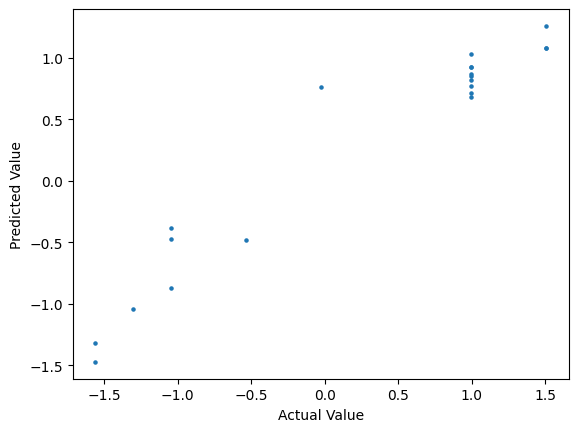

In [33]:
plt.scatter(y_test,y_pred,s=5)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

**PERFORMANCE METRICS**

In [34]:
mean_squared_error(y_test,y_pred)

0.11556265949229982

In [35]:
mean_absolute_error(y_test,y_pred)

0.2711583606255245

In [36]:
x_test = sc.inverse_transform(x_test)

In [37]:
model.score(x_test,y_test)

-0.5242535590902485

In [38]:
r2_score(y_test,y_pred)

0.9055695053154731